<a href="https://colab.research.google.com/github/yongjulee0213/ale_python_interface/blob/master/C3_W4_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import numpy as np

In [110]:
tokenizer=Tokenizer()

data="I know cafe \n I love cafe \n I like cafe"
corpus=data.lower().split('\n')

print(corpus)

['i know cafe ', ' i love cafe ', ' i like cafe']


In [111]:
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total word in corpus : {total_words}')

word index dictionary: {'i': 1, 'cafe': 2, 'know': 3, 'love': 4, 'like': 5}
total word in corpus : 6


In [112]:
#preparing the training data
input_sequences=[]#트레이닝 x들을 input_sequences라 부를 거임
for line in corpus:#코퍼스 라인마다 시퀀스 만들기
  token_list=tokenizer.texts_to_sequences([line])[0]#토큰 뽑아서 시퀀스로 만들자
  for i in range(1, len(token_list)):#전체 토큰을 돌면서 n-grams_sequence를 만들어 낼 것임
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)
print(input_sequences)

[[1, 3], [1, 3, 2], [1, 4], [1, 4, 2], [1, 5], [1, 5, 2]]


In [113]:
#코퍼스에서 제일 긴 문장 찾기
max_sequence_len=max([len(x) for x in input_sequences])

In [114]:
max_sequence_len

3

In [115]:
#전체 문장을 가장 긴 시퀀스 길이에 맞추기
input_sequences=np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,padding='pre'))

In [116]:
input_sequences

array([[0, 1, 3],
       [1, 3, 2],
       [0, 1, 4],
       [1, 4, 2],
       [0, 1, 5],
       [1, 5, 2]], dtype=int32)

In [117]:
#sequeces-> x's(input value), y's(labels)
#마지막 문자 제외 모든 것 ->x
#마지막 문자 ->y

xs=input_sequences[:,:-1]
labels=input_sequences[:,-1]

In [118]:
xs

array([[0, 1],
       [1, 3],
       [0, 1],
       [1, 4],
       [0, 1],
       [1, 5]], dtype=int32)

In [119]:
labels

array([3, 2, 4, 2, 5, 2], dtype=int32)

In [120]:
#labels one -hot encoding(0or1)
#lsit of labels and number of classes whichi is my number of words -> one-hot encoding
ys=tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [121]:
ys

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [122]:
#find the next word
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
#input_dim=11, output_dim=64, input_length=7
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(20))
#최종적으로 나오는 차원의 크기가 11인데 이것은 원핫인코딩에 사용한 것과 같은 크기임.
#단어당 하나의 뉴런을 가지고 있음
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xs,ys,epochs=500,verbose=1)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 1.7951 - accuracy: 0.1667
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 1.7906 - accuracy: 0.1667
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 1.7862 - accuracy: 0.1667
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 1.7818 - accuracy: 0.3333
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 1.7774 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 1.7729 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 1.7684 - accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 1.7639 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 1.7593 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 1.7546 - accuracy: 0.5000
Epoch 11/500
1/1 [===

In [123]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 2, 64)             384       
                                                                 
 lstm_4 (LSTM)               (None, 20)                6800      
                                                                 
 dense_4 (Dense)             (None, 6)                 126       
                                                                 
Total params: 7,310
Trainable params: 7,310
Non-trainable params: 0
_________________________________________________________________


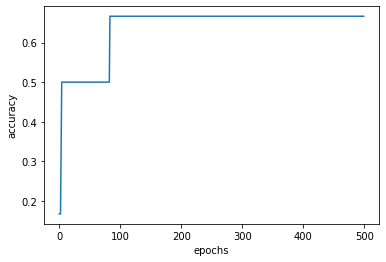

In [124]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.show()

plot_graph(history,'accuracy')

In [127]:
seed_text='I stop driking'

next_words=100

for _ in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
  probabilities=model.predict(token_list)
  predicted=np.argmax(probabilities,axis=-1)[0]

  if predicted!=0:
    output_word=tokenizer.index_word[predicted]
    seed_text+=" " + output_word
print(seed_text)

I stop driking like cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love cafe cafe love
